# Answers for Questions

### Luxuan Wang's Answer

1. What was your biggest challenge in this project?
* The biggest challenge in this project was handling the nested loops to compute the overlapping genes between every 2 pathways. Due to the large size of the dataset, validating the code and ensuring its correctness required a significant amount of time. This made the debugging process challenging, as even small changes in the code could result in a long time to verify the results.
2. What did you learn while working on this project?
* While working on this project, I learned how to manipulate datasets using pandas, especially splitting and mapping data across multiple columns. At the same time, the nested loop I wrote to identify overlapping genes made me realize the importance of code efficiency when working with large datasets. Writing efficient and scalable code in data-intensive projects is really important since it benefits the running time. 
3. If you had more time on the project, what other question(s) would you like to answer?
* I would like to answer the question: How do overlapping genes between biological pathways correlate with their functional relationships and disease associations?


### Ileanexis Madera Cuevas's Answer

1. What was your biggest challenge in this project?
* The biggest challenge in this project was handling the dataset for overlapping genes between all pairs of pathways because of the high computational cost associated with comparing every possible pair of rows. 
2. What did you learn while working on this project?
* I learned the importance of computational methods to manage large datasets efficiently, which require time and complex code but help analyze large datasets more efficiently. I also learned the importance of preprocessing data to enable faster computations. 
3. If you had more time on the project, what other question(s) would you like to answer?
* What biological functions or pathways are most commonly shared between different pathways? To identify critical genes that might be involved in multiple biological processes. 


### Samantha Wheeler's Answer

1. What was your biggest challenge in this project?
My biggest challenge on this project was figuring out how to subset datasets with pandas, as well as how to get my data into a form that could be graphed. 

2. What did you learn while working on this project?
I learned how to make venn diagrams with matplotlib and in a broader sense, how to take code that I was given by other people and interpret it so that I could work on it. I also learned how to use git and github while working with a group of people rather than just using it to keep my own files under version control.

3. If you had more time on the project, what other question(s) would you like to answer?
If I had more time on this project, I would like to look deeper into the list of top genes with most pathway overlap and see what conclusions can be drawn from which genes are overlapping with which other genes.

### Jacob Horn's Answer

1. What was your biggest challenge in this project?
The biggest challenge in this project was reformatting the data in order to answer the question that was posed. I went through several iterations of reformatting the data before it was compatible with what I wanted to do with it.
2. What did you learn while working on this project?
I was surprised by the amount of overlap from the different pathways on the KEGG database. There were many genes that were on 100+ different pathways.
3. If you had more time on the project, what other question(s) would you like to answer?
If I had more time, I would like to make a web of all the genes and pathways to visualize the connections between genes on the KEGG database. It would be interesting to visualize this as a way of displaying the complex nature of gene interactions and pathways. 


In [4]:
import pandas as pd 
import csv
from collections import Counter
import requests
from matplotlib_venn import venn3
from matplotlib_venn import venn2

# Preparation

In [2]:
df_pathway=pd.read_csv("pathway.txt", sep="\t", header=None)
df_pathway.columns=["PATHWAY_ID","PATHWAY_NAME"]
df_gene=pd.read_csv("gene.txt", sep="\t", header=None)
df_gene.columns=["GENE_ID", "TYPE", "TYPE_DESCRIPTION" ,"GENE_INFO"]
df_gene_pathway=pd.read_csv("gen_pathway.txt", sep="\t", header=None)
df_gene_pathway.columns=["GENE_ID" , "PATHWAY_ID"]

In [3]:
df_gene_filter=df_gene.drop(columns=["TYPE","TYPE_DESCRIPTION"])

In [4]:
df_gene_filter_split=df_gene_filter["GENE_INFO"].str.split(';',expand=True)
df_gene_filter_split_new = pd.concat([df_gene_filter.drop(columns=["GENE_INFO"]), df_gene_filter_split], axis=1)
df_gene_filter_split_new.columns=["GENE_ID","GENE_SYMBOL","GENE_NAME"]
df_gene_filter_split_new

,GENE_ID,GENE_SYMBOL,GENE_NAME
0,hsa:102466751,"MIR6859-1, hsa-mir-6859-1",microRNA 6859-1
1,hsa:100302278,"MIR1302-2, MIRN1302-2, hsa-mir-1302-2",microRNA 1302-2
2,hsa:79501,OR4F5,olfactory receptor family 4 subfamily F member 5
3,hsa:102465909,"MIR6859-2, hsa-mir-6859-2",microRNA 6859-2
4,hsa:112268260,uncharacterized LOC112268260,None
...,...,...,...
24678,hsa:124909318,testis-specific Y-encoded protein 3-like,None
24679,hsa:124909320,testis-specific Y-encoded protein 3-like,None
24680,hsa:124909329,testis-specific Y-encoded protein 4-like,None
24681,hsa:124909330,testis-specific Y-encoded protein 1-like,None


# Merge

In [5]:
merge_pathway=df_gene_pathway.merge(df_pathway,how="left", on="PATHWAY_ID")
merge_pathway_gene=merge_pathway.merge(df_gene_filter_split_new, how="left", on="GENE_ID")
merge_pathway_gene

,GENE_ID,PATHWAY_ID,PATHWAY_NAME,GENE_SYMBOL,GENE_NAME
0,hsa:10327,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,"AKR1A1, ALDR1, ALR, ARM, DD3, HEL-S-6",aldo-keto reductase family 1 member A1
1,hsa:124,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,"ADH1A, ADH1","alcohol dehydrogenase 1A (class I), alpha pol..."
2,hsa:125,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,"ADH1B, ADH2, HEL-S-117","alcohol dehydrogenase 1B (class I), beta poly..."
3,hsa:126,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,"ADH1C, ADH3","alcohol dehydrogenase 1C (class I), gamma pol..."
4,hsa:127,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,"ADH4, ADH-2, HEL-S-4","alcohol dehydrogenase 4 (class II), pi polype..."
...,...,...,...,...,...
37456,hsa:91860,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,"CALML4, NY-BR-20",calmodulin like 4
37457,hsa:92,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,"ACVR2A, ACTRII, ACVR2",activin A receptor type 2A
37458,hsa:93,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,"ACVR2B, ACTRIIB, ActR-IIB, HTX4",activin A receptor type 2B
37459,hsa:9446,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,"GSTO1, GSTO_1-1, GSTTLp28, HEL-S-21, P28, SPG-R",glutathione S-transferase omega 1


# Overlapping

In [6]:
overlap_all=list()
for i in range(merge_pathway_gene.shape[0]-1):
    for x in range(i+1,merge_pathway_gene.shape[0]):
        PATHWAY_ID1=merge_pathway_gene.loc[i,"PATHWAY_ID"]
        PATHWAY_NAME1=merge_pathway_gene.loc[i,"PATHWAY_NAME"]
        PATHWAY_ID2=merge_pathway_gene.loc[x,"PATHWAY_ID"]
        PATHWAY_NAME2=merge_pathway_gene.loc[x,"PATHWAY_NAME"]
        overlap_list=list(set(merge_pathway_gene.loc[i,"GENE_SYMBOL"].split(', ')) & set(merge_pathway_gene.loc[x, "GENE_SYMBOL"].split(', ')))
        if overlap_list:
            overlap_list_str='; '.join(overlap_list)
            overlap_all.append([ PATHWAY_ID1,PATHWAY_NAME1, PATHWAY_ID2,PATHWAY_NAME2,len(overlap_list),overlap_list_str])
df_overlap_all=pd.DataFrame(overlap_all)
df_overlap_all.columns=["PATHWAY_ID1", "PATHWAY_NAME1", "PATHWAY_ID2", "PATHWAY_NAME2", "NUMBER_OF_OVERLAPPING_GENES", "LIST_OF_OVERLAPPING_GENES"]


In [8]:
df_overlap_all

,PATHWAY_ID1,PATHWAY_NAME1,PATHWAY_ID2,PATHWAY_NAME2,NUMBER_OF_OVERLAPPING_GENES,LIST_OF_OVERLAPPING_GENES
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00040,Pentose and glucuronate interconversions - Hom...,6,DD3; ALDR1; ALR; AKR1A1; ARM; HEL-S-6
1,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00040,Pentose and glucuronate interconversions - Hom...,1,ALDR1
2,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...,1,ALDR1
3,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00052,Galactose metabolism - Homo sapiens (human),1,ALDR1
4,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00053,Ascorbate and aldarate metabolism - Homo sapie...,6,DD3; ALDR1; ALR; AKR1A1; ARM; HEL-S-6
...,...,...,...,...,...,...
526876,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,6,caM; CAM3; CAMC; PHKD; CALML2; CAMIII
526877,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,3,CAM2; PHKD; CAMB
526878,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,3,PHKD; CALM; CAM1
526879,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,1,CAV


# Save the results

In [9]:
c1=df_overlap_all["PATHWAY_ID1"] != df_overlap_all["PATHWAY_ID2"]
df_overlap_all_final=df_overlap_all[c1].sort_values(by="NUMBER_OF_OVERLAPPING_GENES", ascending=False)
df_overlap_all_final.to_csv("KEGG_crosstalk.csv", index=False)

In [93]:
# Initialize



In [ ]:
gene_counter = Counter()
print(gene_counter)

In [ ]:
gene_counter = Counter()

# Read through each row of the csv, index out only the list of overlapping genes, split by semicolon space and 
# add to a counter of genes. 
with open('gene_pathway_gene_symbols.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader) # SKIP THAT HEADER!!!!!!!!
    for row in reader:
        items = row[0].split()
        gene_counter.update(items)

print("YESSSSSSSSSSSSSSSSSS")

In [ ]:
sorted_gene_counter = Counter(dict(gene_counter.most_common()))

In [ ]:
# Save genes to a txt file.

with open('Gene_Counts.txt', 'w') as file:
    for gene, count in sorted_gene_counter.items():
        file.write(f"{gene}: {count}\n")

In [ ]:
# read in dataframe of gene pathways and gene symbols
gene_df = pd.read_csv('gene_pathway_gene_symbols.csv')
gene_df.head()

In [ ]:
# make a dataframe of all rows that contain one of the top three 
top3_df = gene_df[gene_df['GENE_ID'].isin(top_three)]
top3_df.head()

### 5. Retrieve a set of the pathways the top 3 genes appear on.

In [113]:
# create list of all pathways that the top 3 genes appear on 
set(top3_df['PATHWAY_NAME'].unique().tolist())

{'AGE-RAGE signaling pathway in diabetic complications - Homo sapiens (human)',
 'AMPK signaling pathway - Homo sapiens (human)',
 'Acute myeloid leukemia - Homo sapiens (human)',
 'Adherens junction - Homo sapiens (human)',
 'Adrenergic signaling in cardiomyocytes - Homo sapiens (human)',
 'Alcoholism - Homo sapiens (human)',
 'Aldosterone-regulated sodium reabsorption - Homo sapiens (human)',
 'Alzheimer disease - Homo sapiens (human)',
 'Amoebiasis - Homo sapiens (human)',
 'Apelin signaling pathway - Homo sapiens (human)',
 'Apoptosis - Homo sapiens (human)',
 'Autophagy - animal - Homo sapiens (human)',
 'Axon guidance - Homo sapiens (human)',
 'B cell receptor signaling pathway - Homo sapiens (human)',
 'Bacterial invasion of epithelial cells - Homo sapiens (human)',
 'Bladder cancer - Homo sapiens (human)',
 'Breast cancer - Homo sapiens (human)',
 'C-type lectin receptor signaling pathway - Homo sapiens (human)',
 'Carbohydrate digestion and absorption - Homo sapiens (human)',


### 6. Compute and display a Venn diagram for number of overlapping pathways for the top 3 genes.

In [ ]:
# get top three genes from the list

sorted_gene_counter2 = dict(gene_counter.most_common())
top_three = list(sorted_gene_counter2.keys())[:3]
top_three

In [95]:
# function that returns a set of pathways associated with a particular gene_id
def pathway_setter(df, id):
    paths = set(df.loc[df['GENE_ID'] == id, 'PATHWAY_NAME'])
    return paths

In [97]:
# get the sets 
hsa_5595 = pathway_setter(gene_df, 'hsa:5595')

In [99]:
hsa_5594 = pathway_setter(gene_df, 'hsa:5594')

In [101]:
hsa_5290 = pathway_setter(gene_df, 'hsa:5290')

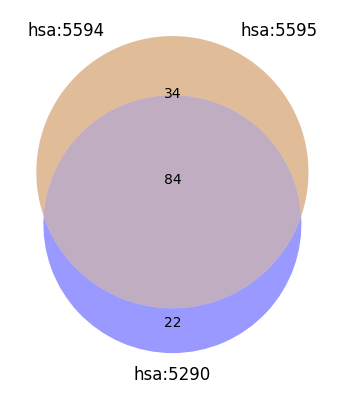

In [103]:
venn3([hsa_5595, hsa_5594, hsa_5290], set_labels = top_three)

# Features

### Samantha Wheeler

### Small GTPase pathway interactions in cancer
[Small GTPases](https://en.wikipedia.org/wiki/Small_GTPase) are vital cellular signaling molecules. There are over 100 small GTPases across five subfamilies. The [Ras](https://en.wikipedia.org/wiki/Ras_GTPase) family is the best known and best-studied in the context of cancer proliferation; however, dysregulation of other small GTPases is known to be involved in carcinogenesis, as well as other diseases. Small GTPase signaling pathways are highly interconnected and understanding the crosstalk between them is a highly biologically relevant question. This feature allows the comparison and visualization of KEGG pathways between some of the most commonly studied small GTPases. 

In [295]:
# dictionary of most common small GTPases associated with disease pathogenesis in general and cancer in particular
# for further reading see https://www.mdpi.com/2072-6694/13/7/1500
gtpase_dict = {'kras': 'hsa:4893',
               'rhoa': 'hsa:387',
               'arf1': 'hsa:375',
               'rab1a': 'hsa:5861',
               'ran': 'hsa:5901'
              }

In [17]:
# read in dataframe of gene symbols with pathways
gene_df = pd.read_csv("gene_pathway_gene_symbols.csv")

### Part one: create dictionary of small GTPases and their associated kegg pathways.
This function takes the gene_pathway_gene_symbols csv and uses it to create a dictionary. This function is generalizable and could also be used to generate dictionaries of other disease genes and their assicated KEGG pathways.

In [286]:
# function that returns a set of pathways associated with a particular gene_id
def pathway_setter_deluxe(fdict, df):#, id):
    key_list = fdict.keys()
    val_list = []
    for value in fdict.values():
        val_list.append(set(gene_df.loc[gene_df['GENE_ID'] == value, 'PATHWAY_NAME']))
    pathway_dict = dict(zip(key_list, val_list))
    return pathway_dict


In [288]:
gtpase_pathways = pathway_setter_deluxe(gtpase_dict, gene_df)
gtpase_pathways

{'kras': {'AGE-RAGE signaling pathway in diabetic complications - Homo sapiens (human)',
  'Acute myeloid leukemia - Homo sapiens (human)',
  'Alcoholism - Homo sapiens (human)',
  'Alzheimer disease - Homo sapiens (human)',
  'Apelin signaling pathway - Homo sapiens (human)',
  'Apoptosis - Homo sapiens (human)',
  'Autophagy - animal - Homo sapiens (human)',
  'Axon guidance - Homo sapiens (human)',
  'B cell receptor signaling pathway - Homo sapiens (human)',
  'Bladder cancer - Homo sapiens (human)',
  'Breast cancer - Homo sapiens (human)',
  'C-type lectin receptor signaling pathway - Homo sapiens (human)',
  'Cellular senescence - Homo sapiens (human)',
  'Central carbon metabolism in cancer - Homo sapiens (human)',
  'Chemical carcinogenesis - reactive oxygen species - Homo sapiens (human)',
  'Chemical carcinogenesis - receptor activation - Homo sapiens (human)',
  'Chemokine signaling pathway - Homo sapiens (human)',
  'Choline metabolism in cancer - Homo sapiens (human)',
  

### Comparison and visualization of KEGG pathways
This function allows the comparison of KEGG pathways and puts out a venn diagram of how many pathways they have in common.

In [271]:
def pathway_intersections(fdict, prot1, prot2):
    protein1 = fdict[prot1]
    protein2 = fdict[prot2]
    intersect = protein1.intersection(protein2)
    labels = [prot1, prot2]
    venn2([protein1, protein2], set_labels = labels)
    return intersect

{'Axon guidance - Homo sapiens (human)',
 'C-type lectin receptor signaling pathway - Homo sapiens (human)',
 'Chemokine signaling pathway - Homo sapiens (human)',
 'Colorectal cancer - Homo sapiens (human)',
 'Human cytomegalovirus infection - Homo sapiens (human)',
 'Lipid and atherosclerosis - Homo sapiens (human)',
 'MicroRNAs in cancer - Homo sapiens (human)',
 'Neurotrophin signaling pathway - Homo sapiens (human)',
 'Oxytocin signaling pathway - Homo sapiens (human)',
 'Pathways in cancer - Homo sapiens (human)',
 'Phospholipase D signaling pathway - Homo sapiens (human)',
 'Proteoglycans in cancer - Homo sapiens (human)',
 'Rap1 signaling pathway - Homo sapiens (human)',
 'Ras signaling pathway - Homo sapiens (human)',
 'Regulation of actin cytoskeleton - Homo sapiens (human)',
 'Sphingolipid signaling pathway - Homo sapiens (human)',
 'T cell receptor signaling pathway - Homo sapiens (human)',
 'Viral carcinogenesis - Homo sapiens (human)',
 'mTOR signaling pathway - Homo sapi

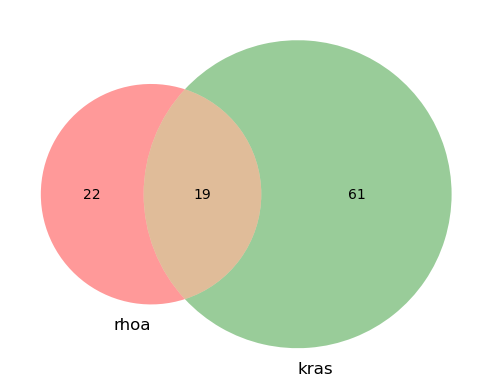

In [273]:
# some examples of the function in action
pathway_intersections(gtpase_pathways, 'rhoa', 'kras')

set()

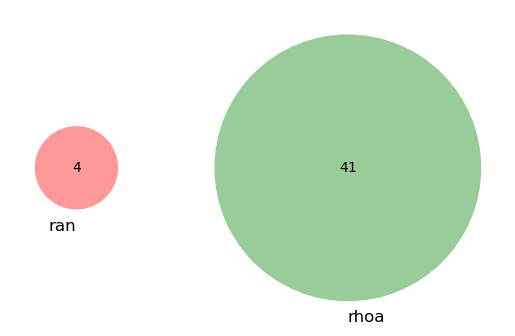

In [277]:
pathway_intersections(gtpase_pathways, 'ran', 'rhoa')

{'Legionellosis - Homo sapiens (human)',
 'Pathogenic Escherichia coli infection - Homo sapiens (human)'}

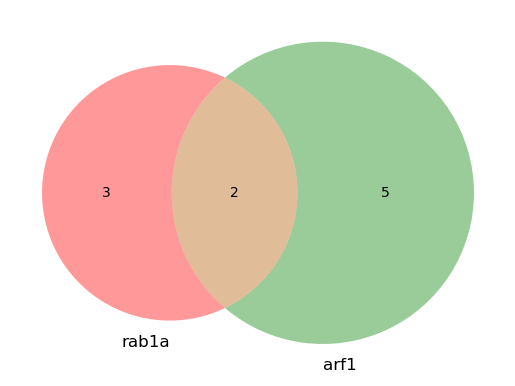

In [290]:
pathway_intersections(gtpase_pathways, 'rab1a', 'arf1')

{'Autophagy - animal - Homo sapiens (human)',
 'Pathways of neurodegeneration - multiple diseases - Homo sapiens (human)'}

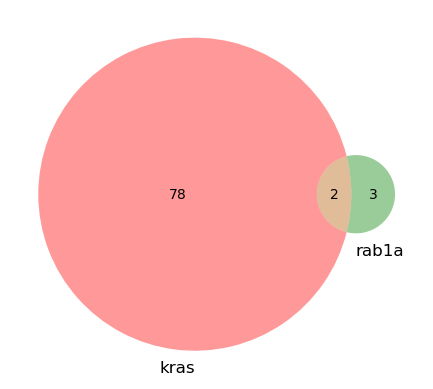

In [305]:
pathway_intersections(gtpase_pathways, 'kras', 'rab1a')

### Jacob Horn

### Luxuan Wang

My feature addresses the follwing question:  
What is the distribution of gene counts across KEGG pathways?  
By analyzing the number of genes associated with each pathway, it help us understand overall structure and complexity of the KEGG pathway and indentfy the core pathways that may play important roles in biological systems.

In [22]:
import matplotlib.pyplot as plt

### Count the number of genes associated with each pathway

By defining the count_genes_per_pathway function, we can group genes associated with the same pathway and calculate the number of genes within each pathway.

In [27]:
gene_pathway_df = pd.read_csv("./gene_pathway_gene_symbols.csv")

In [30]:
def count_genes_per_pathway(gene_pathway_df):
    pathway_counts = gene_pathway_df.groupby('PATHWAY_NAME')['GENE_ID'].count()
    pathway_counts = pathway_counts.sort_values(ascending=False).reset_index()
    pathway_counts.columns = ['Pathway', 'Gene_Count']
    return pathway_counts

gene_counts_df = count_genes_per_pathway(gene_pathway_df)

In [33]:
gene_counts_df

,Pathway,Gene_Count
0,Metabolic pathways - Homo sapiens (human),1563
1,Pathways in cancer - Homo sapiens (human),533
2,Herpes simplex virus 1 infection - Homo sapien...,523
3,Pathways of neurodegeneration - multiple disea...,483
4,Olfactory transduction - Homo sapiens (human),453
...,...,...
356,"Neomycin, kanamycin and gentamicin biosynthesi...",5
357,Virion - Adenovirus - Homo sapiens (human),4
358,"Valine, leucine and isoleucine biosynthesis - ...",4
359,Biotin metabolism - Homo sapiens (human),3


### Plot the distribution of gene counts across pathways

Here, we visualize the distribution of gene counts across pathways by generating a histogram.

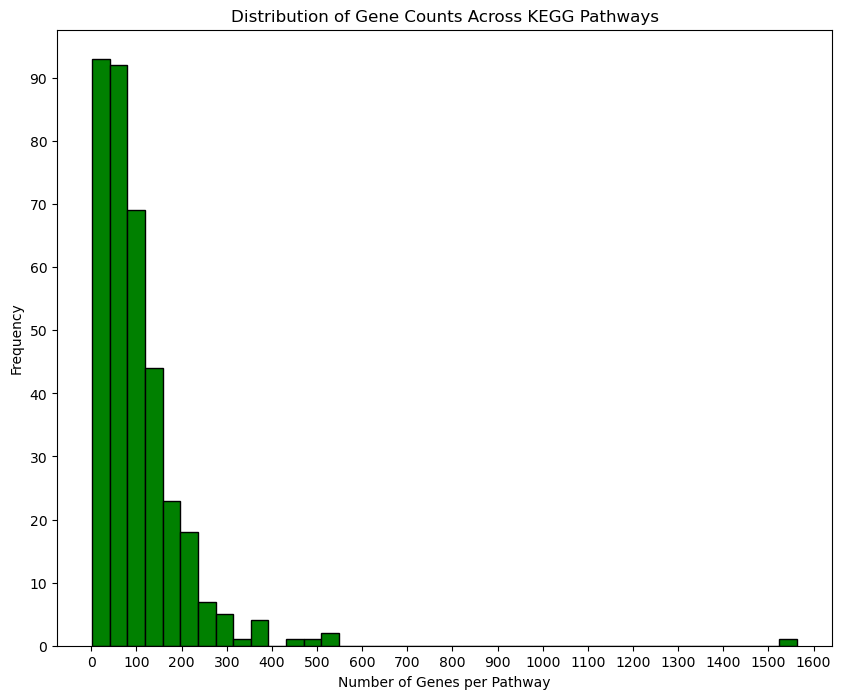

In [40]:
def plot_gene_count_distribution(gene_counts_df):
    plt.figure(figsize=(10, 8))
    plt.hist(gene_counts_df['Gene_Count'], bins=40, color='green',edgecolor='black')
    plt.xlabel('Number of Genes per Pathway')
    plt.ylabel('Frequency')
    plt.title('Distribution of Gene Counts Across KEGG Pathways')
    plt.xticks(range(0, int(plt.gca().get_xlim()[1]) + 1, 100))
    plt.yticks(range(0, int(plt.gca().get_ylim()[1]) + 1, 10))
    plt.show()

# Plot the distribution of gene counts
plot_gene_count_distribution(gene_counts_df)

### Analyze the distribution pattern of gene counts across pathways

Finally, we provide a numerical analysis of the distribution, calculating the maximum, minimum, median, and mean values to quantitatively characterize the pattern of gene counts across pathways.

In [47]:
def analyze_distribution(gene_counts_df):
    mean_count = gene_counts_df['Gene_Count'].mean()
    median_count = gene_counts_df['Gene_Count'].median()
    max_count = gene_counts_df['Gene_Count'].max()
    min_count = gene_counts_df['Gene_Count'].min()
    return {
        "Mean": mean_count,
        "Median": median_count,
        "Max": max_count,
        "Min": min_count
    }

distribution_summary = analyze_distribution(gene_counts_df)
for key, value in distribution_summary.items():
    print(f"{key}: {value}")

Mean: 103.77008310249307
Median: 78.0
Max: 1563
Min: 2


### Results Interpretation

From the figure, we can observe a long-tail pattern in the distribution of gene counts across KEGG pathways. Most pathways have relatively few genes, with the median pathway containing 78 genes. However, a small subset of pathways, such as the largest one with 1563 genes, stand out as outliers. These pathways are likely involved in highly complex and integrative biological processes, such as major metabolic or signaling networks. So, further we should investigate these gene-rich pathways to get insght in their biological roles and regulatory mechanisms.

### Ileanexis Madera Cuevas